# 1.importting models we going to use

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

pd.options.display.max_rows=1500
pd.options.display.max_columns=36

In [2]:
A = pd.read_csv("E:\data science\HR-Employee-Attrition-Table 1.csv")

In [4]:
A.head()
#A.info

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# 2.dropping unnessary columns form data

In [5]:
#coloumns to drop
#employid,EmployeeCount,Over18

A.drop(labels=["EmployeeNumber","EmployeeCount","Over18","StandardHours"],axis=1,inplace=True)
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [6]:
A.describe()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# 3.EDA part

In [7]:
A.Attrition.value_counts() #0--- not left & 1--- left the company

0    1233
1     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

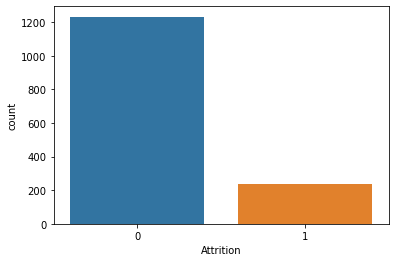

In [8]:
sb.countplot(A.Attrition)

<AxesSubplot:xlabel='Gender', ylabel='count'>

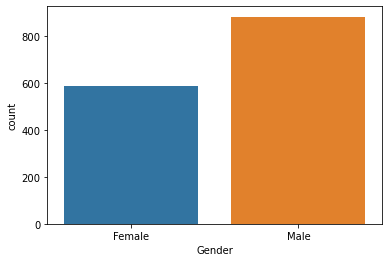

In [9]:
sb.countplot(A.Gender)

<AxesSubplot:xlabel='Education', ylabel='count'>

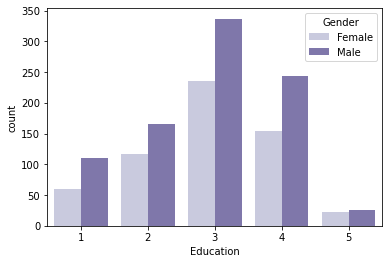

In [10]:
sb.countplot(x="Education",hue="Gender",data=A,palette="Purples")

<AxesSubplot:>

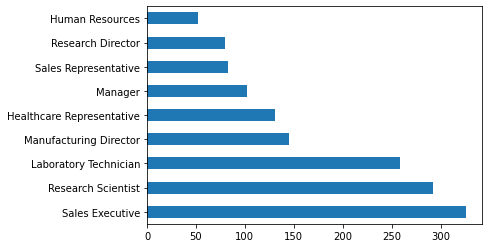

In [11]:
A.JobRole.value_counts().plot(kind="barh")

<AxesSubplot:xlabel='Age', ylabel='count'>

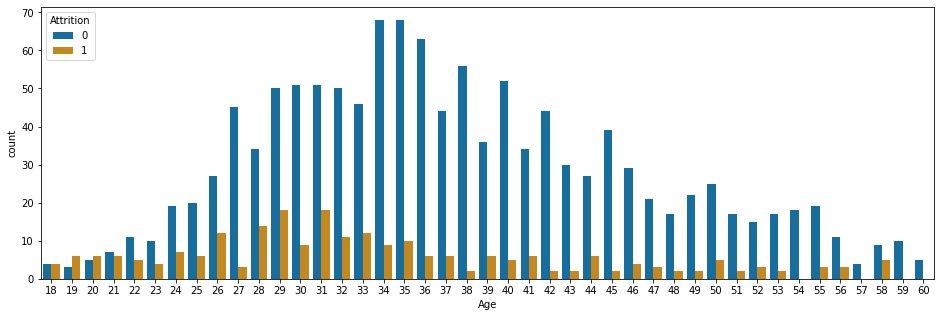

In [12]:
plt.figure(figsize=(16,5))
sb.countplot(x="Age",hue="Attrition",data=A,palette="colorblind")

<AxesSubplot:>

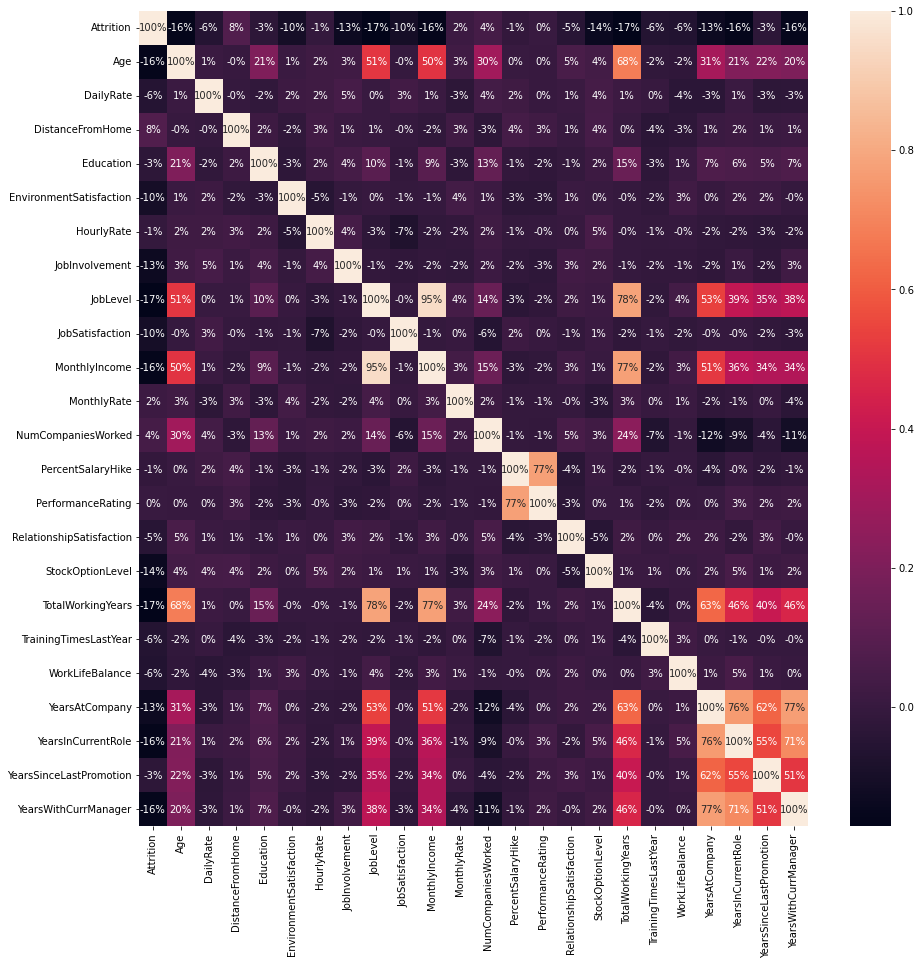

In [13]:
plt.figure(figsize=(15,15))
sb.heatmap(A.corr(),annot=True,fmt=".0%")

# 4.Data preprocessing

In [18]:
cat=[]
con=[]
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [19]:
cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [20]:
con

['Attrition',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [23]:
X1=pd.get_dummies(A[cat])

In [24]:
X1.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [25]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X2=pd.DataFrame(ss.fit_transform(A[con]),columns=con)

In [26]:
X3=X2.join(X1)

In [27]:
X3.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,...,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,2.280906,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,-0.438422,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,2.280906,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,...,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,-0.438422,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,-0.438422,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [28]:
X3.drop(labels=["Attrition"],axis=1,inplace=True)

In [29]:
X3["Attrition"]=A.Attrition

In [30]:
X3.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,...,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0


In [31]:
Y=X3[["Attrition"]]
X=X3.drop(labels=["Attrition"],axis=1)

# 5.spliting data

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=31)

# 6.Decision Tree regression

In [33]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=10)
model = dtr.fit(xtrain,ytrain)

pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)

from sklearn.metrics import mean_squared_error
print("Training Error: ",round(mean_squared_error(ytrain,pred_tr),2))
print("Testing Error: ",round(mean_squared_error(ytest,pred_ts),2))


Training Error:  0.0
Testing Error:  0.23


In [34]:
dtr.score(xtrain,ytrain)

1.0

In [35]:
dtr.score(xtest,ytest)

-1.0153962197178101

# Random Forest Regression

In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10,random_state=21)
model1=rfr.fit(xtrain,ytrain)
pred_Tr=model1.predict(xtrain)
pred_Ts=model1.predict(xtest)

from sklearn.metrics import mean_squared_error
print("Training Error: ",round(mean_squared_error(ytrain,pred_Tr),2))
print("Testing Error: ",round(mean_squared_error(ytest,pred_Ts),2))


Training Error:  0.02
Testing Error:  0.12


In [37]:
rfr.score(xtest,ytest)

-0.033330819061141215

# Tunned RFR For Better Accurancy

In [38]:
tg={"max_depth":range(2,10,1),"n_estimators":range(2,20,1)}
rfr=RandomForestRegressor(random_state=21)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(rfr,tg,scoring=("neg_mean_squared_error"),cv=4)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 7, 'n_estimators': 16}

In [39]:
from sklearn.ensemble import RandomForestRegressor
rfr1=RandomForestRegressor(n_estimators=16,random_state=21,max_depth=7)
model1=rfr1.fit(xtrain,ytrain)
pred_Tr=model1.predict(xtrain)
pred_Ts=model1.predict(xtest)

from sklearn.metrics import mean_squared_error
print("Training Error: ",round(mean_squared_error(ytrain,pred_Tr),2))
print("Testing Error: ",round(mean_squared_error(ytest,pred_Ts),2))

Training Error:  0.04
Testing Error:  0.11


In [40]:
rfr1.score(xtest,ytest)

0.06389718297916314

# Adaboosting DTR

In [41]:
from sklearn.ensemble import AdaBoostRegressor

abc=AdaBoostRegressor(DecisionTreeRegressor(max_depth=2,random_state=21),n_estimators=30,random_state=21)
model2=abc.fit(xtrain,ytrain)

pred_TR=model.predict(xtrain)
pred_TS=model.predict(xtest)

from sklearn.metrics import mean_squared_error
print("Training Error: ",round(mean_squared_error(ytrain,pred_TR),2))
print("Testing Error: ",round(mean_squared_error(ytest,pred_TS),2))

Training Error:  0.0
Testing Error:  0.23


# 7.Logestic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
Model=lr.fit(xtrain,ytrain)
prediction=Model.predict(xtest)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ytest,prediction)

0.8798185941043084

In [43]:
confusion_matrix(ytest,prediction)

array([[356,  26],
       [ 27,  32]], dtype=int64)

# 8.KNN Regression

In [44]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
KNmodel=knr.fit(xtrain,ytrain)

kn_pred=KNmodel.predict(xtest)
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(ytest,kn_pred))

0.20317460317460317


In [45]:
for i in range(2,10,1):
    from sklearn.neighbors import KNeighborsRegressor
    knr=KNeighborsRegressor(n_neighbors=i)
    KNmodel=knr.fit(xtrain,ytrain)

    kn_pred=KNmodel.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    print(i,mean_absolute_error(ytest,kn_pred))

2 0.1927437641723356
3 0.20030234315948603
4 0.1984126984126984
5 0.20317460317460317
6 0.20408163265306123
7 0.2037576935536119
8 0.2060657596371882
9 0.20534139581758634


In [46]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=2)
KNmodel=knr.fit(xtrain,ytrain)

kn_pred=KNmodel.predict(xtest)
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(ytest,kn_pred))

0.1927437641723356


# 9.Classification Model


 9.1 Decision tree classification

In [47]:
Y=X3[["Attrition"]]
X=X3.drop(labels=["Attrition"],axis=1)


from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=31)


from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,criterion="entropy")
dtc_model = dtc.fit(xtrain,ytrain)


predTR=dtc_model.predict(xtrain)
predTS=dtc_model.predict(xtest)


from sklearn.metrics import accuracy_score
print("Training Error: ",round(accuracy_score(ytrain,predTR),4))
print("Testing Error: ",round(accuracy_score(ytest,predTS),4))

Training Error:  1.0
Testing Error:  0.78


In [1]:
from sklearn.tree import export_graphviz
export_graphviz(dtc,out_file=("E:\data science\Meta Data-Table 1.csv")

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_960/3493340564.py, line 2)

In [67]:
list(enumerate(X.columns)) #50 become root predictor and soo on

[(0, 'Age'),
 (1, 'DailyRate'),
 (2, 'DistanceFromHome'),
 (3, 'Education'),
 (4, 'EnvironmentSatisfaction'),
 (5, 'HourlyRate'),
 (6, 'JobInvolvement'),
 (7, 'JobLevel'),
 (8, 'JobSatisfaction'),
 (9, 'MonthlyIncome'),
 (10, 'MonthlyRate'),
 (11, 'NumCompaniesWorked'),
 (12, 'PercentSalaryHike'),
 (13, 'PerformanceRating'),
 (14, 'RelationshipSatisfaction'),
 (15, 'StockOptionLevel'),
 (16, 'TotalWorkingYears'),
 (17, 'TrainingTimesLastYear'),
 (18, 'WorkLifeBalance'),
 (19, 'YearsAtCompany'),
 (20, 'YearsInCurrentRole'),
 (21, 'YearsSinceLastPromotion'),
 (22, 'YearsWithCurrManager'),
 (23, 'BusinessTravel_Non-Travel'),
 (24, 'BusinessTravel_Travel_Frequently'),
 (25, 'BusinessTravel_Travel_Rarely'),
 (26, 'Department_Human Resources'),
 (27, 'Department_Research & Development'),
 (28, 'Department_Sales'),
 (29, 'EducationField_Human Resources'),
 (30, 'EducationField_Life Sciences'),
 (31, 'EducationField_Marketing'),
 (32, 'EducationField_Medical'),
 (33, 'EducationField_Other'),
 

# Try to rRedue Overfiting by Prunning(max_depth)

In [52]:
for i in range(2,20,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc=DecisionTreeClassifier(random_state=21,max_depth=i)
    dtc_model=dtc.fit(xtrain,ytrain)
    
    predTR=dtc_model.predict(xtrain)
    predTS=dtc_model.predict(xtest)
    
    from sklearn.metrics import accuracy_score
    print("=========",i,"==============")
    print("training Acc:",round(accuracy_score(ytrain,predTR),4))
    print("testing Acc:",round(accuracy_score(ytest,predTS),4))
    

========= 2 ==============
training Acc: 0.8416
testing Acc: 0.8549
========= 3 ==============
training Acc: 0.8523
testing Acc: 0.8526
========= 4 ==============
training Acc: 0.8795
testing Acc: 0.8458
========= 5 ==============
training Acc: 0.9057
testing Acc: 0.8141
========= 6 ==============
training Acc: 0.9232
testing Acc: 0.8299
========= 7 ==============
training Acc: 0.9485
testing Acc: 0.8141
========= 8 ==============
training Acc: 0.964
testing Acc: 0.8073
========= 9 ==============
training Acc: 0.9825
testing Acc: 0.805
========= 10 ==============
training Acc: 0.9893
testing Acc: 0.7846
========= 11 ==============
training Acc: 0.9951
testing Acc: 0.8005
========= 12 ==============
training Acc: 0.9971
testing Acc: 0.7868
========= 13 ==============
training Acc: 0.999
testing Acc: 0.7868
========= 14 ==============
training Acc: 1.0
testing Acc: 0.7755
========= 15 ==============
training Acc: 1.0
testing Acc: 0.7755
========= 16 ==============
training Acc: 1.0
testi

In [56]:
#max_depth=4
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=21,max_depth=4)
dtc_model=dtc.fit(xtrain,ytrain)

predTR=dtc_model.predict(xtrain)
predTS=dtc_model.predict(xtest)

from sklearn.metrics import accuracy_score

print("training Acc:",round(accuracy_score(ytrain,predTR),4))
print("testing Acc:",round(accuracy_score(ytest,predTS),4))

training Acc: 0.8795
testing Acc: 0.8458
